# Part 1

In [59]:
# Prerequisite
# Installing PySpark and FindSpark
!pip install pyspark
!pip install findspark

# Initializing FindSpark to locate Spark
import findspark
findspark.init()

# Importing necessary PySpark modules
from pyspark.sql import SparkSession
from pyspark.sql.functions import when, regexp_replace

# Initializing Spark Session
spark = SparkSession.builder \
    .appName("DataWrangling") \
    .getOrCreate()

print("Spark session initialized!")

Spark session initialized!


In [60]:
# Installing gdown and downloading the file from Google Drive
!pip install gdown

# File ID of the CSV file on Google Drive
file_id = '1STAeZ6S6zPIIkrWZWAFEKsslWoWNRyX2'

# Downloading and saving it as 'transactionrecord.csv'
!gdown {file_id} -O transactionrecord.csv

# Defining the path to the downloaded CSV file
csv_file_path = 'transactionrecord.csv'

# Reading the CSV file into a PySpark DataFrame
df = spark.read.csv(csv_file_path, header=True, inferSchema=True)

# Displaying the first few rows of the DataFrame
df.show(truncate=False)


Downloading...
From: https://drive.google.com/uc?id=1STAeZ6S6zPIIkrWZWAFEKsslWoWNRyX2
To: C:\Windows\System32\transactionrecord.csv

  0%|          | 0.00/44.6M [00:00<?, ?B/s]
  1%|1         | 524k/44.6M [00:00<00:22, 1.96MB/s]
  4%|3         | 1.57M/44.6M [00:00<00:10, 4.12MB/s]
  6%|5         | 2.62M/44.6M [00:00<00:08, 4.95MB/s]
  8%|8         | 3.67M/44.6M [00:00<00:07, 5.75MB/s]
 11%|#         | 4.72M/44.6M [00:00<00:06, 6.08MB/s]
 13%|#2        | 5.77M/44.6M [00:01<00:06, 6.32MB/s]
 15%|#5        | 6.82M/44.6M [00:01<00:05, 6.49MB/s]
 18%|#7        | 7.86M/44.6M [00:01<00:05, 6.54MB/s]
 20%|##        | 8.91M/44.6M [00:01<00:05, 6.60MB/s]
 22%|##2       | 9.96M/44.6M [00:01<00:05, 6.68MB/s]
 25%|##4       | 11.0M/44.6M [00:01<00:05, 6.67MB/s]
 27%|##7       | 12.1M/44.6M [00:01<00:04, 6.66MB/s]
 29%|##9       | 13.1M/44.6M [00:02<00:04, 6.76MB/s]
 32%|###1      | 14.2M/44.6M [00:02<00:04, 6.72MB/s]
 34%|###4      | 15.2M/44.6M [00:02<00:04, 6.70MB/s]
 36%|###6      | 16.3M/44.6M 

+-------------+---------+---------+-----------------------------------+----------------+-----+--------+----------+--------------+
|TransactionNo|Date     |ProductNo|ProductName                        |Product_category|Price|Quantity|CustomerNo|Country       |
+-------------+---------+---------+-----------------------------------+----------------+-----+--------+----------+--------------+
|581482       |12/9/2019|22485    |Set Of 2 Wooden Market Crates      |0ca             |21.47|12      |17490     |United Kingdom|
|581475       |12/9/2019|22596    |Christmas Star Wish List Chalkboard|0ca             |10.65|36      |13069     |United Kingdom|
|581475       |12/9/2019|23235    |Storage Tin Vintage Leaf           |0ca             |11.53|12      |13069     |United Kingdom|
|581475       |12/9/2019|23272    |Tree T-Light Holder Willie Winkie  |0ca             |10.65|12      |13069     |United Kingdom|
|581475       |12/9/2019|23239    |Set Of 4 Knick Knack Tins Poppies  |0ca             |11

## Question 1.1: Using PySpark to do some of the data wrangling process, so that: 1.1.1 For the ’NA’ in CustomerNo columns, change it to ’-1’.

## 1.1.1 For the ’NA’ in CustomerNo columns, change it to ’-1’.

In [61]:
from pyspark.sql.types import IntegerType

# Displaying the schema to understand the data structure
df.printSchema()

# Data Wrangling

print("Initial Dataframe:")

# Showing the updated DataFrame
df.show(5)

# Replacing 'NA' in 'CustomerNo' with '-1' and casting to IntegerType
df_ps = df.withColumn(
    "CustomerNo",
    when(df.CustomerNo == "NA", -1).otherwise(df.CustomerNo).cast(IntegerType())
)

print("Rows with CustomerNo as 'NA'")

# Verifying no 'NA' values remain in CustomerNo
df_ps.filter(df_ps.CustomerNo.isNull()).show()


root
 |-- TransactionNo: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- ProductNo: string (nullable = true)
 |-- ProductName: string (nullable = true)
 |-- Product_category: string (nullable = true)
 |-- Price: double (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- CustomerNo: integer (nullable = true)
 |-- Country: string (nullable = true)

Initial Dataframe:
+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+
|TransactionNo|     Date|ProductNo|         ProductName|Product_category|Price|Quantity|CustomerNo|       Country|
+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+
|       581482|12/9/2019|    22485|Set Of 2 Wooden M...|             0ca|21.47|      12|     17490|United Kingdom|
|       581475|12/9/2019|    22596|Christmas Star Wi...|             0ca|10.65|      36|     13069|United Kingdom|
|       581475|12/9/2019|  

## 1.1.2 Process the text in productName column, only alphabet characters left, and save the processed result to a new column productName_process and show the first 5 rows.

In [62]:
# Importing necessary functions from PySpark
from pyspark.sql.functions import col, regexp_replace

# Processing the ProductName column to keep only alphabet characters
df = df.withColumn('productName_process', regexp_replace(col('ProductName'), '[^a-zA-Z]', ''))

# Showing the first 5 rows of the DataFrame to verify the changes
df.select('ProductName', 'productName_process').show(5,truncate=False)


+-----------------------------------+-------------------------------+
|ProductName                        |productName_process            |
+-----------------------------------+-------------------------------+
|Set Of 2 Wooden Market Crates      |SetOfWoodenMarketCrates        |
|Christmas Star Wish List Chalkboard|ChristmasStarWishListChalkboard|
|Storage Tin Vintage Leaf           |StorageTinVintageLeaf          |
|Tree T-Light Holder Willie Winkie  |TreeTLightHolderWillieWinkie   |
|Set Of 4 Knick Knack Tins Poppies  |SetOfKnickKnackTinsPoppies     |
+-----------------------------------+-------------------------------+
only showing top 5 rows



## 1.2.1 Using pyspark to calculate the revenue (price * Quantity) and save as float format in pyspark dataframe to show the top 5 rows.

In [63]:
# Importing necessary functions
from pyspark.sql.functions import col

# Calculating revenue (Price * Quantity) and casting it to float
df = df.withColumn('Revenue', (col('Price') * col('Quantity')).cast('float'))

# Showing the top 5 rows with the new 'revenue' column
df.select("TransactionNo", "Date", "Price", "Quantity", "Revenue").show(5, truncate=False)


+-------------+---------+-----+--------+-------+
|TransactionNo|Date     |Price|Quantity|Revenue|
+-------------+---------+-----+--------+-------+
|581482       |12/9/2019|21.47|12      |257.64 |
|581475       |12/9/2019|10.65|36      |383.4  |
|581475       |12/9/2019|11.53|12      |138.36 |
|581475       |12/9/2019|10.65|12      |127.8  |
|581475       |12/9/2019|11.94|6       |71.64  |
+-------------+---------+-----+--------+-------+
only showing top 5 rows



## 1.2.2 Transform the pyspark dataframe to pandas dataframe (named as df) and create the column transaction_date with date format according to Date. Print your df pandas dataframe with top 5 rows after creating the column transaction_date.

In [64]:
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when, regexp_replace
from tabulate import tabulate

# Converting the PySpark DataFrame to a Pandas DataFrame
df_pandas = df.toPandas()

# Creating the 'transaction_date' column with the correct date format
df_pandas['transaction_date'] = pd.to_datetime(df_pandas['Date'], format='%m/%d/%Y')

# Printing the top 5 rows of the Pandas DataFrame
print(tabulate(df_pandas.head(5), headers='keys', tablefmt='fancy_grid', showindex=True))


╒════╤═════════════════╤═══════════╤═════════════╤═════════════════════════════════════╤════════════════════╤═════════╤════════════╤══════════════╤════════════════╤═════════════════════════════════╤═══════════╤═════════════════════╕
│    │   TransactionNo │ Date      │   ProductNo │ ProductName                         │ Product_category   │   Price │   Quantity │   CustomerNo │ Country        │ productName_process             │   Revenue │ transaction_date    │
╞════╪═════════════════╪═══════════╪═════════════╪═════════════════════════════════════╪════════════════════╪═════════╪════════════╪══════════════╪════════════════╪═════════════════════════════════╪═══════════╪═════════════════════╡
│  0 │          581482 │ 12/9/2019 │       22485 │ Set Of 2 Wooden Market Crates       │ 0ca                │   21.47 │         12 │        17490 │ United Kingdom │ SetOfWoodenMarketCrates         │    257.64 │ 2019-12-09 00:00:00 │
├────┼─────────────────┼───────────┼─────────────┼──────────────────

## 1.2.3 Plot the sum of revenue on transaction_date in a line plot and find out any immediate pattern / insight?

╒════╤═════════════════════╤═══════════╕
│    │ transaction_date    │   Revenue │
╞════╪═════════════════════╪═══════════╡
│  0 │ 2018-12-01 00:00:00 │    324649 │
├────┼─────────────────────┼───────────┤
│  1 │ 2018-12-02 00:00:00 │    260302 │
├────┼─────────────────────┼───────────┤
│  2 │ 2018-12-03 00:00:00 │    201975 │
├────┼─────────────────────┼───────────┤
│  3 │ 2018-12-05 00:00:00 │    196631 │
├────┼─────────────────────┼───────────┤
│  4 │ 2018-12-06 00:00:00 │    270657 │
╘════╧═════════════════════╧═══════════╛


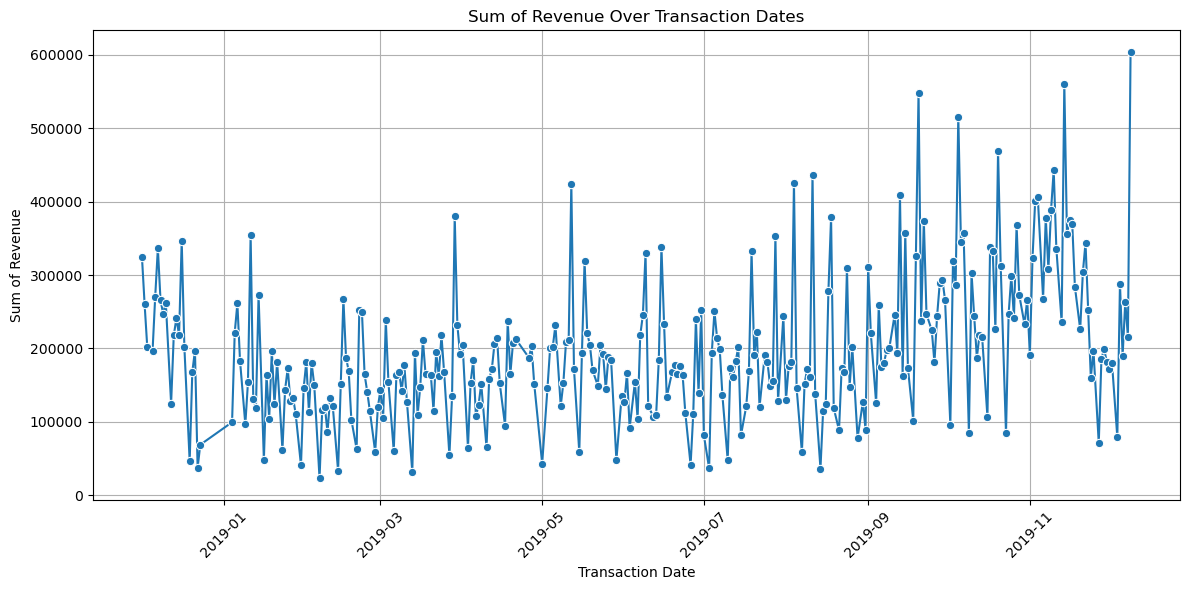

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


# Warnings
warnings.filterwarnings('ignore', category=FutureWarning)


# Grouping by 'transaction_date' and sum the revenue
revenue_by_date = df_pandas.groupby('transaction_date')['Revenue'].sum().reset_index()

# Displaying the top 5 rows of the Pandas DataFrame
print(tabulate(revenue_by_date.head(5), headers='keys', tablefmt='fancy_grid', showindex=True))

# Setting the 'transaction_date' as the index for plotting
revenue_by_date.set_index('transaction_date', inplace=True)

# Plotting the sum of revenue over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=revenue_by_date, x=revenue_by_date.index, y='Revenue', marker='o')

# Adding titles and labels
plt.title('Sum of Revenue Over Transaction Dates')
plt.xlabel('Transaction Date')
plt.ylabel('Sum of Revenue')
plt.grid(True)
plt.xticks(rotation=45)

# Showing the plot
plt.tight_layout()
plt.show()


**Key Insights from the Revenue Graph:**
* **Seasonal Peaks:** Significant revenue increases towards the end of the year, likely due to holidays or promotions.
* **Overall Uptrend:** Gradual growth in revenue throughout the year suggests increasing sales or business expansion.
* **Revenue Spikes and Dips:** Notable spikes in May, September, and December and dips in early months indicate fluctuating demand.
* **Potential Cycles:** Patterns suggest possible repeating cycles, which could be linked to regular sales events or seasonality.

## 1.3.1 Determine which workday (day of the week), generates the most sales (plotting the results in  a line chart with workday on averaged revenues).

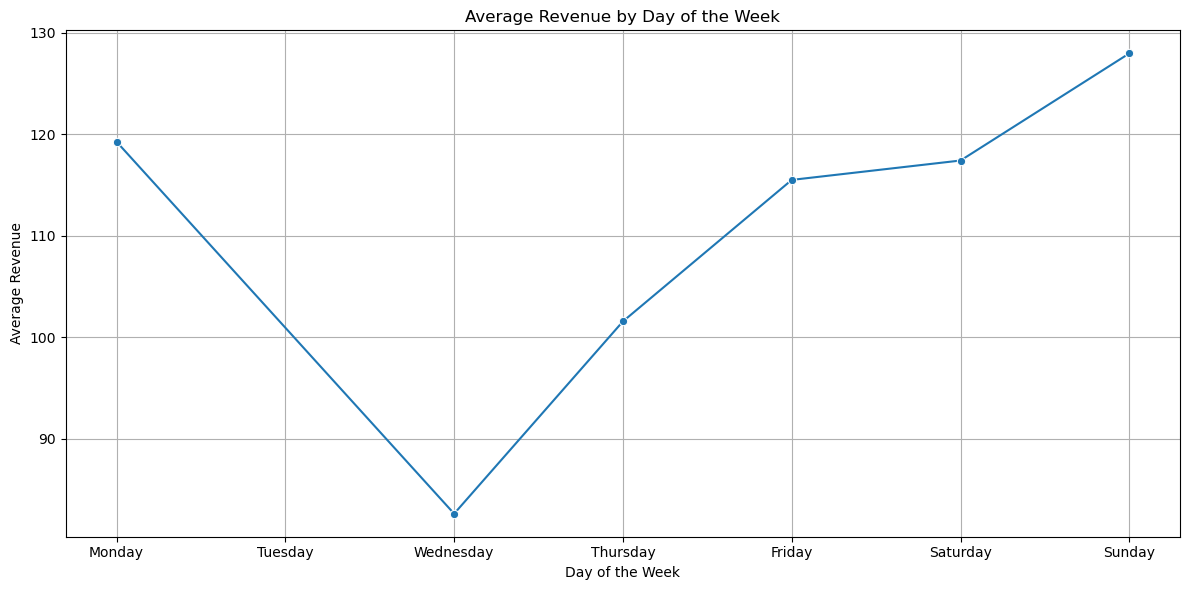

The workday with the highest average revenue is: Sunday


In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Extracting day of the week (Monday=0, Sunday=6) and mapping to a more readable format
df_pandas['day_of_week'] = df_pandas['transaction_date'].dt.day_name()

warnings.filterwarnings('ignore', category=FutureWarning)

# Calculating average revenue for each day of the week
avg_revenue_by_day = df_pandas.groupby('day_of_week')['Revenue'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index()

# Plotting the average revenue per day of the week
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_revenue_by_day, x='day_of_week', y='Revenue', marker='o', sort=False)

# Adding titles and labels
plt.title('Average Revenue by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Revenue')
plt.grid(True)

# Showing the plot
plt.tight_layout()
plt.show()

# Finding the day with the highest average revenue
highest_revenue_day = avg_revenue_by_day.sort_values(by='Revenue', ascending=False).iloc[0]['day_of_week']

# Determining the workday with the highest average revenue
highest_avg_revenue_day = avg_revenue_by_day.loc[avg_revenue_by_day['Revenue'].idxmax(), 'day_of_week']
print(f"The workday with the highest average revenue is: {highest_revenue_day}")




## 1.3.2 Identify the name of product (column productName_process) that contributes the highest  revenue on ‘that workday’ (you need to find out from 1.3.1) and the name of product (column  productName_process) that has the highest sales volume (sum of the Quantity), no need to  remove negative quantity transactions.) on ‘that workday’ (you need to find out from 1.3.1).

In [67]:
import pandas as pd

# Filtering transactions for that workday
filtered_df = df_pandas[df_pandas['day_of_week'] == highest_avg_revenue_day]

# Calculating total revenue and sales volume for each product

# Total revenue by product
revenue_by_product = filtered_df.groupby('productName_process')['Revenue'].sum().reset_index()
top_revenue_product = revenue_by_product.loc[revenue_by_product['Revenue'].idxmax()]

# Total sales volume by product
sales_volume_by_product = filtered_df.groupby('productName_process')['Quantity'].sum().reset_index()
top_sales_volume_product = sales_volume_by_product.loc[sales_volume_by_product['Quantity'].idxmax()]

# Printing results
print(f"On {highest_avg_revenue_day}, the product with the highest revenue is:")
print(top_revenue_product)

print(f"\nOn {highest_avg_revenue_day}, the product with the highest sales volume is:")
print(top_sales_volume_product)


On Sunday, the product with the highest revenue is:
productName_process    WorldWarGlidersAsstdDesigns
Revenue                               187081.34375
Name: 3285, dtype: object

On Sunday, the product with the highest sales volume is:
productName_process    WorldWarGlidersAsstdDesigns
Quantity                                     18051
Name: 3285, dtype: object


## 1.3.3 Please provide two plots showing the top 5 products that contribute the highest revenues in  general and top 5 products that have the highest sales volumes in general.

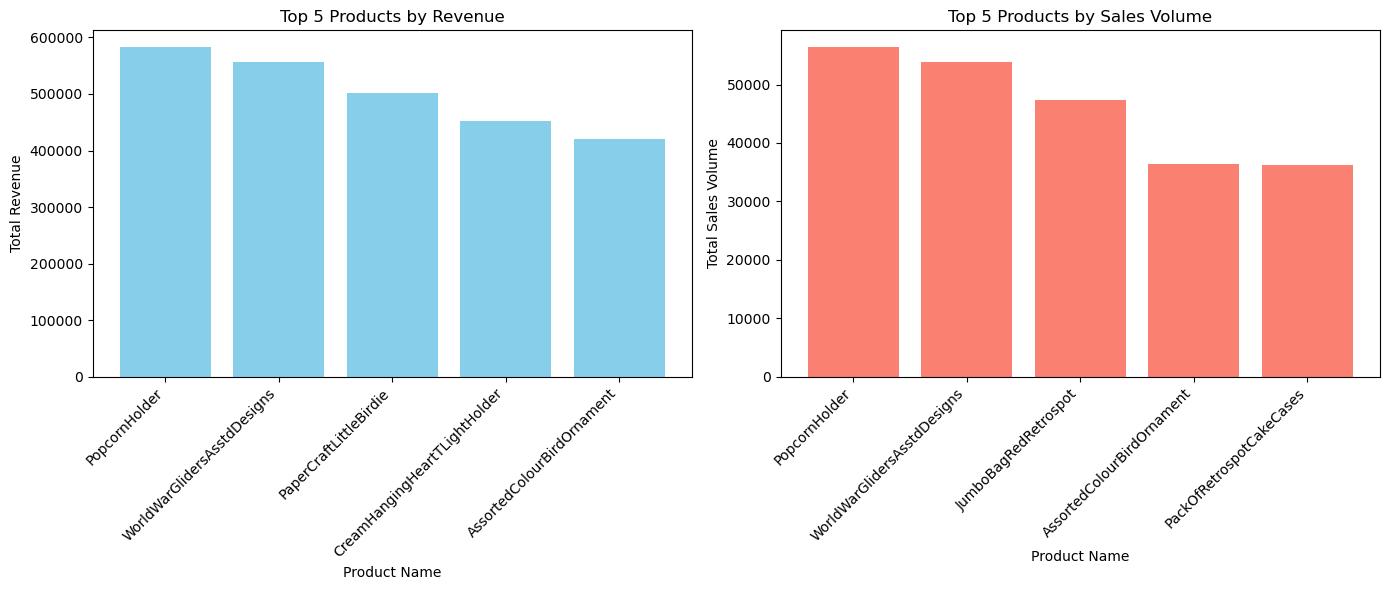

In [68]:
import pandas as pd
import matplotlib.pyplot as plt


# Aggregating total revenue and sales volume by product
revenue_by_product = df_pandas.groupby('productName_process')['Revenue'].sum().reset_index()
sales_volume_by_product = df_pandas.groupby('productName_process')['Quantity'].sum().reset_index()

# Sorting and select top 5 products for revenue
top_revenue_products = revenue_by_product.sort_values(by='Revenue', ascending=False).head(5)

# Sorting and select top 5 products for sales volume
top_sales_volume_products = sales_volume_by_product.sort_values(by='Quantity', ascending=False).head(5)

# Plotting top 5 products by revenue
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(top_revenue_products['productName_process'], top_revenue_products['Revenue'], color='skyblue')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.title('Top 5 Products by Revenue')
plt.xticks(rotation=45, ha='right')

# Plotting top 5 products by sales volume
plt.subplot(1, 2, 2)
plt.bar(top_sales_volume_products['productName_process'], top_sales_volume_products['Quantity'], color='salmon')
plt.xlabel('Product Name')
plt.ylabel('Total Sales Volume')
plt.title('Top 5 Products by Sales Volume')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


## Question 1.4   Which country generates the highest revenue? Additionally, identify the month in that country that  has the highest revenue.

In [69]:
# Importing necessary libraries
import pandas as pd

# Groupping by 'Country' and calculate the total revenue for each country
revenue_by_country = df_pandas.groupby('Country')['Revenue'].sum().reset_index()

# Identifying the country with the highest total revenue
top_country = revenue_by_country.sort_values(by='Revenue', ascending=False).iloc[0]
print(f"The country with the highest revenue is: {top_country['Country']} with revenue: {top_country['Revenue']}")

# Filtering data for the country with the highest revenue
top_country_data = df_pandas[df_pandas['Country'] == top_country['Country']].copy()

# Extracting month and year from 'transaction_date'
top_country_data['Month'] = top_country_data['transaction_date'].dt.month_name()
top_country_data['Year'] = top_country_data['transaction_date'].dt.year

# Grouping by 'Month' and 'Year' and calculate total revenue
revenue_by_month_year = top_country_data.groupby(['Year', 'Month'])['Revenue'].sum().reset_index()

# Step 6: Identifying the month and year with the highest revenue
top_month_year = revenue_by_month_year.sort_values(by='Revenue', ascending=False).iloc[0]
print(f"The month and year with the highest revenue in {top_country['Country']} is: {top_month_year['Month']} {top_month_year['Year']} with revenue: {top_month_year['Revenue']}")


The country with the highest revenue is: United Kingdom with revenue: 49994032.0
The month and year with the highest revenue in United Kingdom is: November 2019 with revenue: 6737640.0


## Question 1.5  Let’s do some analysis on the CustomerNo and their transactions. Determine the shopping frequency of  customers to identify who shops most frequently (find out the highest distinct count of transactionNo  on customer level, be careful with those transactions that is not for shopping – filter those  transaction quantity <= 0). Also, find out what products (column productName_process) ‘this  customer’ typically buys based on the Quantity of products purchased.

In [70]:
from pyspark.sql.functions import col, countDistinct, sum as spark_sum
from pyspark.sql import SparkSession

# Converting the Pandas DataFrame to a PySpark DataFrame
df_spark = spark.createDataFrame(df_pandas)

# Filtering out transactions with Quantity <= 0 (non-shopping transactions)
filtered_df = df_spark.filter(col("Quantity") > 0)

# Counting distinct transactions per customer
customer_transaction_counts = (
    filtered_df
    .groupBy("CustomerNo")
    .agg(countDistinct("TransactionNo").alias("distinct_transactions"))
)

# Finding the customer with the highest distinct transaction count
most_frequent_customer = customer_transaction_counts.orderBy(col("distinct_transactions").desc()).first()

# Printing the most frequent customer
print(f"The most frequent customer is: {most_frequent_customer['CustomerNo']}")
print(f"Number of distinct transactions: {most_frequent_customer['distinct_transactions']}")

# Filtering data for the most frequent customer
most_frequent_customer_data = filtered_df.filter(col("CustomerNo") == most_frequent_customer["CustomerNo"])

# Aggregating quantities for products purchased by the most frequent customer
product_quantities = (
    most_frequent_customer_data
    .groupBy("productName_process")
    .agg(spark_sum("Quantity").alias("total_quantity"))
    .orderBy(col("total_quantity").desc())
)

# Showing the top products purchased by this customer with full column names
product_quantities.show(truncate=False)


The most frequent customer is: 12748
Number of distinct transactions: 207
+-------------------------------+--------------+
|productName_process            |total_quantity|
+-------------------------------+--------------+
|VictorianMetalPostcardSpring   |595           |
|WorldWarGlidersAsstdDesigns    |480           |
|RoseScentCandleJewelledDrawer  |408           |
|CartoonPencilSharpeners        |405           |
|SmallWhiteRetrospotMugInBox    |390           |
|VanillaScentCandleJewelledBox  |380           |
|SmallRedRetrospotMugInBox      |372           |
|BubblegumRingAssorted          |318           |
|PopartWoodenPencilsAsst        |300           |
|OceanScentCandleInJewelledBox  |225           |
|PensAssortedFunnyFace          |216           |
|AssortedCreepyCrawlies         |216           |
|GarageKeyFob                   |174           |
|MarieAntoinetteTrinketBoxSilver|168           |
|KeyFobShed                     |164           |
|BrocadeRingPurse               |158        

## 1.6.1 Group by the transactionNo and aggregate the category of product (column  product_category) into list on transactionNo level. Similarly, group and aggregate name of  product (column productName_process) into list on transactionNo level.

In [71]:
import pandas as pd
from tabulate import tabulate

# Filtering the DataFrame to include only valid shopping transactions (Quantity > 0)
filtered_df = df_pandas[df_pandas['Quantity'] > 0]

# Grouping by 'TransactionNo' and aggregate 'product_category' and 'productName_process' into lists
grouped_df = filtered_df.groupby('TransactionNo').agg({
    'Product_category': lambda x: list(x),  # Aggregating 'Product_category' into a list
    'productName_process': lambda x: list(x)  # Aggregating 'productName_process' into a list
}).reset_index()

# Adjusting Pandas display options to show the full content of each column without truncation
pd.set_option('display.max_colwidth', None)

# Printing the top 10 rows of the grouped DataFrame in a tabular format
print(tabulate(grouped_df.head(10), headers='keys', tablefmt='fancy_grid', showindex=False))


╒═════════════════╤═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╕
│   TransactionNo │ Product_category                                                                                                                      │ productName_process                                                                                                                                                                    

## 1.6.2 Removing duplicates on adjacent elements in the list from product_category you obtained  from 1.6.1, such as [product category 1, product category 1, product category  2, ...] will be processed as [product category 1, product category 2,....]. After this  processing, there will be no duplicates on on adjacent elements in the list. Please save your  processed dataframe as ‘df_1’ and print the top 10 rows.

In [72]:
import pandas as pd
from tabulate import tabulate

# Function to remove adjacent duplicates from a list
def remove_adjacent_duplicates(lst):
    if not lst:
        return lst
    processed_list = [lst[0]]  # Start with the first element
    for i in range(1, len(lst)):
        if lst[i] != lst[i - 1]:  # Add element only if it's different from the previous one
            processed_list.append(lst[i])
    return processed_list

# Applying the function to remove adjacent duplicates from 'Product_category'
grouped_df['processed_categories'] = grouped_df['Product_category'].apply(remove_adjacent_duplicates)

# Saving the processed DataFrame as 'df_1'
df_1 = grouped_df[['TransactionNo', 'processed_categories', 'productName_process']]

# Adjusting Pandas display options to show the full content of each column without truncation
pd.set_option('display.max_colwidth', None)

# Printing the top 10 rows of the processed DataFrame 'df_1' in a tabular format
print(tabulate(df_1.head(10), headers='keys', tablefmt='fancy_grid', showindex=False))


╒═════════════════╤════════════════════════╤════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╕
│   TransactionNo │ processed_categories   │ productName_process                                                                                                                                                                                                                                                                                                                                                                                                  

## 1.7.1 Create new column prod_len to find out the length of the list from product_category on  each transaction. Print the first five rows of dataframe ‘df_1’.

In [73]:
import pandas as pd
from tabulate import tabulate

# Creating a new column 'prod_len' that calculates the length of each 'processed_categories' list
df_1['prod_len'] = df_1['processed_categories'].apply(len)

# Printing the first five rows of the DataFrame 'df_1' in a tabular format
print(tabulate(df_1.head(5), headers='keys', tablefmt='fancy_grid', showindex=False))

df_1.info()


╒═════════════════╤════════════════════════╤═════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤════════════╕
│   TransactionNo │ processed_categories   │ productName_process                                                                                                                                                                                                                                                                                                                     │   prod_len │
╞═════════════════╪════════════════════════╪════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════

## 1.7.2 Transform the list in product_category from [productcategory1, productcategory2...]  to ‘start > productcategory1 > productcategory2 > ... > conversion’ with new column  path. You need to add ‘start’ as the first element, and ‘conversion’ as the last. Also  you need to use ‘ > ’ to connect each of the transition on products (there is a space between  the elements and the transition symbol >). The final format after the transition is given in  example as below fig. 2. Define the function data_processing to achieve above with three  arguments: df which is the dataframe name, maxlength with default value of 3 for filtering the  dataframe with prod_len" <=maxlength and minlength with default value of 1 for filtering  the dataframe with prod_len >=minlength. The function data_processing will return the  new dataframe ‘df_2’. Run your defined function with dataframe ‘df_1’, maxlength = 5 and  minlength = 2, print the dataframe ‘df_2’ with top 10 rows.

In [74]:
# Function to transform the product category list into the desired transition path format
def transform_path(lst):
    # Adding 'start' at the beginning and 'conversion' at the end
    path = ['start'] + lst + ['conversion']
    # Joining the list elements with ' > ' to form the final path string
    return ' > '.join(path)

# Function to process the DataFrame and filter based on prod_len, returning a new DataFrame df_2
def data_processing(df, maxlength=3, minlength=1):
    # Filter the DataFrame based on the length of product categories
    filtered_df = df[(df['prod_len'] <= maxlength) & (df['prod_len'] >= minlength)].copy()
    # Apply the transform_path function to create the 'path' column
    filtered_df['path'] = filtered_df['processed_categories'].apply(transform_path)
    # Return the processed DataFrame
    return filtered_df

# Applying the data_processing function with specific parameters
df_2 = data_processing(df_1, maxlength=5, minlength=2)

# Printing the top 10 rows of the resulting DataFrame 'df_2'
print(tabulate(df_2.head(10), headers='keys', tablefmt='fancy_grid', showindex=False))

# Printing only the 'TransactionNo' and 'path' columns from 'df_2'
print("\nTransaction Number and Path Columns (For easier readability):")
print(tabulate(df_2[['TransactionNo', 'path']].head(10), headers='keys', tablefmt='fancy_grid', showindex=False))


╒═════════════════╤═════════════════════════════════════╤═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════

## 1.8.1 Check on your transaction level basket with results from question 1.7, could you please find  out respectively how many transactions ended with pattern ‘... > 0ca > conversion’ / ‘...  > 1ca > conversion’ / ‘... > 2ca > conversion’ / ‘... > 3ca > conversion’ / ‘... >  4ca > conversion’ (1 result for each pattern, total 5 results are expected).

In [75]:
# Defining patterns to search for
patterns = [
    '> 0ca > conversion',
    '> 1ca > conversion',
    '> 2ca > conversion',
    '> 3ca > conversion',
    '> 4ca > conversion'
]

# Initializing a dictionary to store the count of each pattern
pattern_counts = {pattern: 0 for pattern in patterns}

# Counting transactions ending with each pattern
for pattern in patterns:
    pattern_counts[pattern] = df_2['path'].str.endswith(pattern).sum()

# Displaying the results in a tabular format
results_df = pd.DataFrame(list(pattern_counts.items()), columns=['Pattern', 'Count'])
print(tabulate(results_df, headers='keys', tablefmt='fancy_grid', showindex=False))


╒════════════════════╤═════════╕
│ Pattern            │   Count │
╞════════════════════╪═════════╡
│ > 0ca > conversion │    3056 │
├────────────────────┼─────────┤
│ > 1ca > conversion │      26 │
├────────────────────┼─────────┤
│ > 2ca > conversion │     144 │
├────────────────────┼─────────┤
│ > 3ca > conversion │      68 │
├────────────────────┼─────────┤
│ > 4ca > conversion │     198 │
╘════════════════════╧═════════╛


## 1.8.2 Check on your transaction level basket with results from question 1.7, could you please find  out respectively how many times the transactions contains ‘0ca > 0ca’ / ‘0ca > 1ca’ / ‘0ca >  2ca’ / ‘0ca > 3ca’ / ‘0ca > 4ca’ / ‘0ca > conversion’ in the whole data (1 result for each  pattern, total 6 results are expected and each transaction could contain those patterns multiple  times, such as ‘start > 0ca > 1ca > 0ca > 1ca > conversion’ will count ‘two’ times with  pattern ‘0ca > 1ca’, if there is not any, then return 0, you need to sum the counts from each  transaction to return the final value).

In [76]:
import pandas as pd
from tabulate import tabulate

# Defining patterns to search for
patterns = [
    '0ca > 0ca',
    '0ca > 1ca',
    '0ca > 2ca',
    '0ca > 3ca',
    '0ca > 4ca',
    '0ca > conversion'
]

# Initializing a dictionary to store the count of each pattern
pattern_counts = {pattern: 0 for pattern in patterns}

# Counting occurrences of each pattern within each transaction
for pattern in patterns:
    pattern_counts[pattern] = df_2['path'].str.count(pattern).sum()

# Displaying the results in a tabular format
results_df = pd.DataFrame(list(pattern_counts.items()), columns=['Pattern', 'Count'])
print(tabulate(results_df, headers='keys', tablefmt='fancy_grid', showindex=False))


╒══════════════════╤═════════╕
│ Pattern          │   Count │
╞══════════════════╪═════════╡
│ 0ca > 0ca        │       0 │
├──────────────────┼─────────┤
│ 0ca > 1ca        │    1222 │
├──────────────────┼─────────┤
│ 0ca > 2ca        │    1137 │
├──────────────────┼─────────┤
│ 0ca > 3ca        │     343 │
├──────────────────┼─────────┤
│ 0ca > 4ca        │    1198 │
├──────────────────┼─────────┤
│ 0ca > conversion │    3056 │
╘══════════════════╧═════════╛


## 1.8.3 Check on your transaction level basket with results from task question 1.7, could you please  find out how many times the transactions contains ‘...> 0ca > ...’ in the whole data (1  result is expected and each transaction could contain the pattern multiple times, such as ‘start  > 0ca > 1ca > 0ca > 1ca > conversion’ will count ‘two’ times, you need to sum the counts  from each transaction to return the final value).

In [77]:
import pandas as pd
from tabulate import tabulate

# Defining the pattern to search for
pattern = '0ca >'

# Counting the occurrences of the pattern '0ca >' in the path column
pattern_count_0ca = df_2['path'].str.count(pattern).sum()

# Displaying the result
print(tabulate([[pattern, pattern_count_0ca]], headers=['Pattern', 'Count'], tablefmt='fancy_grid', showindex=False))


╒═══════════╤═════════╕
│ Pattern   │   Count │
╞═══════════╪═════════╡
│ 0ca >     │    6956 │
╘═══════════╧═════════╛


## 1.8.4 Use the 6 results from 1.8.2 to divide the result from 1.8.3 and then sum all of them and return the value.


In [78]:
# Calculating the division and sum of all results
result_sum = sum(count / pattern_count_0ca for count in pattern_counts.values())

# Printing the final result
print(f"Sum of divided results: {result_sum}")


Sum of divided results: 1.0


## 1.9.1 Work on the dataframe df from question 1.2 (filter out the transaction with negative quantity  value and also only keep those top 100 products by ranking the sum of quantity) and  build the transaction level product dataframe (each row represents transactionNo and  productName_process become the columns, the value in the column is the Quantity).

In [79]:
import pandas as pd
from tabulate import tabulate

# Filtering out transactions with negative quantity values
df_filtered = df_pandas[df_pandas['Quantity'] > 0]

# Calculating the total quantity for each product and rank them
top_products = df_filtered.groupby('productName_process')['Quantity'].sum().reset_index()

# Sorting products by total quantity in descending order and keep the top 100
top_products = top_products.sort_values(by='Quantity', ascending=False).head(100)

# Filtering the main DataFrame to keep only the top 100 products
df_top_products = df_filtered[df_filtered['productName_process'].isin(top_products['productName_process'])]

# Pivoting the DataFrame to create a transaction-level product DataFrame
transaction_df = df_top_products.pivot_table(
    index='TransactionNo',
    columns='productName_process',
    values='Quantity',
    aggfunc='sum',
    fill_value=0
)

# Displaying the first 10 rows of the transaction-level product DataFrame
print(tabulate(transaction_df.head(10), headers='keys', tablefmt='fancy_grid', showindex=True))


╒═════════════════╤═══════════════════════════════╤════════════════════════════╤══════════════════════════════╤══════════════════════════╤════════════════════════════╤═════════════════════════════╤═════════════════════╤═════════════════════════╤════════════════════╤═════════════════════════╤═════════════════════════════╤════════════════════════════╤══════════════════════════╤════════════════╤══════════════════════════════════╤═════════════════════════╤═════════════════════════════════╤════════════════════════════════╤═════════════════════╤════════════════════╤══════════════════════════════════╤════════════════════════════╤══════════════════════════════╤════════════════════════════════╤═══════════════════════════════╤════════════════════════════════╤══════════════════════════════╤══════════════════════╤══════════════════════╤═════════════════════════════╤═══════════════════════╤════════════════════╤══════════════════╤═════════════════════════════╤════════════════╤═══════════════════════

## 1.9.2 Run the apriori algorithm to identify items with minimum support of 1.5% (only looking at baskets with 4 or more items).

In [80]:
# !pip install mlxtend
import warnings
import pandas as pd
from mlxtend.frequent_patterns import apriori # This should now work
from tabulate import tabulate
import warnings
from mlxtend.frequent_patterns import apriori

# Warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)


# Filtering transactions to include only baskets with 4 or more items
transaction_df_filtered = transaction_df[(transaction_df > 0).sum(axis=1) >= 4]

# Converting quantities to boolean values
transaction_df_binary = transaction_df_filtered.gt(0)

# Running the apriori algorithm with a minimum support of 1.5%
frequent_itemsets = apriori(transaction_df_binary, min_support=0.015, use_colnames=True)

# Displaying the frequent itemsets found
print(tabulate(frequent_itemsets.head(10), headers='keys', tablefmt='fancy_grid', showindex=False))


╒═══════════╤════════════════════════════════════════════╕
│   support │ itemsets                                   │
╞═══════════╪════════════════════════════════════════════╡
│ 0.0312763 │ frozenset({'AgedGlassSilverTLightHolder'}) │
├───────────┼────────────────────────────────────────────┤
│ 0.0858345 │ frozenset({'AntiqueSilverTLightGlass'})    │
├───────────┼────────────────────────────────────────────┤
│ 0.126928  │ frozenset({'AssortedColourBirdOrnament'})  │
├───────────┼────────────────────────────────────────────┤
│ 0.0546985 │ frozenset({'AssortedColoursSilkFan'})      │
├───────────┼────────────────────────────────────────────┤
│ 0.0570827 │ frozenset({'BaggSwirlyMarbles'})           │
├───────────┼────────────────────────────────────────────┤
│ 0.030014  │ frozenset({'BlackRecordCoverFrame'})       │
├───────────┼────────────────────────────────────────────┤
│ 0.0232819 │ frozenset({'BrocadeRingPurse'})            │
├───────────┼───────────────────────────────────────────

## 1.9.3 Run the apriori algorithm to find the items with support >= 1.0% and lift > 10.

In [81]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from tabulate import tabulate

# Running the apriori algorithm with a minimum support of 1.0%
frequent_itemsets = apriori(transaction_df_binary, min_support=0.01, use_colnames=True)

# Generating association rules with lift > 10
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=10)

# Filtering rules with support >= 1.0%
rules_filtered = rules[rules['support'] >= 0.01]

# Displaying the filtered rules found
print(tabulate(rules_filtered.head(10), headers='keys', tablefmt='fancy_grid', showindex=False))


╒══════════════════════════════════════════════════════════════════════════════╤══════════════════════════════════════════════════════════════════════════════╤══════════════════════╤══════════════════════╤═══════════╤══════════════╤═════════╤════════════╤══════════════╤═════════════════╕
│ antecedents                                                                  │ consequents                                                                  │   antecedent support │   consequent support │   support │   confidence │    lift │   leverage │   conviction │   zhangs_metric │
╞══════════════════════════════════════════════════════════════════════════════╪══════════════════════════════════════════════════════════════════════════════╪══════════════════════╪══════════════════════╪═══════════╪══════════════╪═════════╪════════════╪══════════════╪═════════════════╡
│ frozenset({'WoodenHeartChristmasScandinavian'})                              │ frozenset({'WoodenStarChristmasScandinavian'})      

## 1.9.4 Please explore three more examples with different support / confidence / lift measurements  (you could leverage your rule mining with one of the three measurements or all of them) to  find out any of the interesting patterns from the Association rule learning. Save your code and  results in a clean and tidy format and writing down your insights.

In [82]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from tabulate import tabulate

# Example 1: Minimum support = 1.0%, confidence > 60%, lift > 4
# Runnig the apriori algorithm with a minimum support of 1.0%
frequent_itemsets_1 = apriori(transaction_df_binary, min_support=0.01, use_colnames=True)

# Generating association rules with confidence > 60%
rules_1 = association_rules(frequent_itemsets_1, metric="confidence", min_threshold=0.6)

# Filtering rules with lift > 4
rules_1_filtered = rules_1[rules_1['lift'] > 4]

# Displaying the filtered rules found
print("Example 1: Support = 1.0%, Confidence = 60%, Lift > 4")
print(tabulate(rules_1_filtered.head(10), headers='keys', tablefmt='fancy_grid', showindex=False))


# Example 2: Minimum support = 0.8%, confidence > 75%, lift > 6
# Runnig the apriori algorithm with a minimum support of 0.8%
frequent_itemsets_2 = apriori(transaction_df_binary, min_support=0.008, use_colnames=True)

# Generating association rules with confidence > 75%
rules_2 = association_rules(frequent_itemsets_2, metric="confidence", min_threshold=0.75)

# Filtering rules with lift > 6
rules_2_filtered = rules_2[rules_2['lift'] > 6]

# Displaying the filtered rules found
print("\nExample 2: Support = 0.8%, Confidence = 75%, Lift > 6")
print(tabulate(rules_2_filtered.head(10), headers='keys', tablefmt='fancy_grid', showindex=False))


# Example 3: Minimum support = 1.9%, confidence > 65%, lift > 5
# Running the apriori algorithm with a minimum support of 1.9%
frequent_itemsets_3 = apriori(transaction_df_binary, min_support=0.019, use_colnames=True)

# Generating association rules with confidence > 65%
rules_3 = association_rules(frequent_itemsets_3, metric="confidence", min_threshold=0.65)

# Filtering rules with lift > 5
rules_3_filtered = rules_3[rules_3['lift'] > 5]

# Displaying the filtered rules found
print("\nExample 3: Support = 1.9%, Confidence = 65%, Lift > 5")
print(tabulate(rules_3_filtered.head(10), headers='keys', tablefmt='fancy_grid', showindex=False))


Example 1: Support = 1.0%, Confidence = 60%, Lift > 4
╒═════════════════════════════════════════════════╤════════════════════════════════════════════════╤══════════════════════╤══════════════════════╤═══════════╤══════════════╤══════════╤════════════╤══════════════╤═════════════════╕
│ antecedents                                     │ consequents                                    │   antecedent support │   consequent support │   support │   confidence │     lift │   leverage │   conviction │   zhangs_metric │
╞═════════════════════════════════════════════════╪════════════════════════════════════════════════╪══════════════════════╪══════════════════════╪═══════════╪══════════════╪══════════╪════════════╪══════════════╪═════════════════╡
│ frozenset({'CharlotteBagPinkPolkadot'})         │ frozenset({'RedRetrospotCharlotteBag'})        │            0.0981767 │            0.135063  │ 0.07223   │     0.735714 │  5.44719 │  0.05897   │      3.27273 │        0.905298 │
├─────────────────────

**Insights from the Results:**

**Example 1: Support = 1.0%, Confidence = 60%, Lift > 4**

**1) Key Observations:**
* Rules such as 'CharlotteBagPinkPolkadot' -> 'RedRetrospotCharlotteBag' and 'SpaceboyLunchBox' -> 'DollyGirlLunchBox' suggest strong associations between similar-themed or complementary items.
* High lift values indicate these items are frequently purchased together much more than by chance, suggesting effective cross-selling opportunities.

**2) Insights:**
* Products like lunchboxes and bags with similar designs or themes are frequently bought together, likely appealing to the same customer segment (e.g., kids' or themed products).
* This insight can be leveraged to bundle items or promote them as complementary products in marketing campaigns.

**Example 2: Support = 0.8%, Confidence = 75%, Lift > 6**

**1) Key Observations:**
* Strong associations are seen among holiday-themed items like 'WoodenStarChristmasScandinavian' -> 'WoodenHeartChristmasScandinavian'.
* Seasonal and themed products show a strong tendency to be bought together, especially during holidays.

**2) Insights:**
* These rules can be used to create targeted promotions during holiday seasons, encouraging customers to complete their collections or decorations by purchasing related items.
* These patterns can also inform stock decisions, ensuring that frequently paired items are kept in sync.

**Example 3: Support = 1.9%, Confidence = 65%, Lift > 5**

**1) Key Observations:**
* Associations such as 'PaperChainKitVintageChristmas' -> 'PaperChainKitSChristmas' highlight a trend of customers purchasing similar decorative items together.
* High lifts in rules involving themed bags and holiday decorations indicate a strong preference for coordinated or themed shopping experiences.

**2) Insights:**
* This data highlights the importance of product themes and bundles. Promoting items that are frequently bought together (e.g., through "Buy Together and Save" promotions) could increase overall basket size.
* Stocking decisions can also be optimized to keep frequently associated items together on shelves, enhancing the customer shopping experience.

**Overall Strategic Recommendations:**
* **Bundle Promotions:** The frequent co-purchases suggest opportunities for creating product bundles, especially around themes like Christmas or matching items like bags and lunchboxes.
* **Cross-Sell and Up-Sell:** Utilize insights from these rules in online and in-store suggestions to cross-sell products. For example, when a customer adds a themed lunchbox to their cart, suggest a matching bag or decoration item.
* **Inventory Management:** Ensure stock availability of frequently associated items to avoid losing sales when customers look for commonly bought-together products.

## 1.10.1 Work on the dataframe df from question 1.2 and build the customer product dataframe  (each row represents single customerNo and productName_process become as the columns,  the value in the columns is the aggregated Quantity value from all transactions and the result  is a N by M matrix where N is the number of distinct customerNo and M is the number of  distinct productName_process. Please filter out the transaction with negative quantity value  and also only keep those top 100 product by ranking the sum of quantity).

In [83]:
import pandas as pd
from tabulate import tabulate

# Filtering out transactions with negative quantity
filtered_df = df_pandas[df_pandas['Quantity'] > 0]

# Ranking products by the total quantity sold and select the top 100 products
top_products = (
    filtered_df.groupby('productName_process')['Quantity']
    .sum()
    .sort_values(ascending=False)
    .head(100)
    .index
)

# Filtering the dataframe to include only the top 100 products
filtered_df_top = filtered_df[filtered_df['productName_process'].isin(top_products)]

# Creating the customer-product matrix using pivot table
customer_product_df = filtered_df_top.pivot_table(
    index='CustomerNo',
    columns='productName_process',
    values='Quantity',
    aggfunc='sum',
    fill_value=0
)

# Displaying the resulting dataframe using tabulate for a formatted view
print(tabulate(customer_product_df.head(10), headers='keys', tablefmt='fancy_grid', showindex=True))


╒══════════════╤═══════════════════════════════╤════════════════════════════╤══════════════════════════════╤══════════════════════════╤════════════════════════════╤═════════════════════════════╤═════════════════════╤═════════════════════════╤════════════════════╤═════════════════════════╤═════════════════════════════╤════════════════════════════╤══════════════════════════╤════════════════╤══════════════════════════════════╤═════════════════════════╤═════════════════════════════════╤════════════════════════════════╤═════════════════════╤════════════════════╤══════════════════════════════════╤════════════════════════════╤══════════════════════════════╤════════════════════════════════╤═══════════════════════════════╤════════════════════════════════╤══════════════════════════════╤══════════════════════╤══════════════════════╤═════════════════════════════╤═══════════════════════╤════════════════════╤══════════════════╤═════════════════════════════╤════════════════╤════════════════════════╤═

## 1.10.2 Use the customer-product dataframe, let’s calculate the Pairwise Euclidean distance on customer level (you will need to use the product Quantity information on each customer to calculate the Euclidean distance for all other customers and the result is a N by N matrix where N is the number of distinct customerNo).

In [84]:
from scipy.spatial.distance import pdist, squareform
from tabulate import tabulate

# Calculate pairwise Euclidean distances between all customers
# pdist computes the pairwise distance, and squareform converts it into a square matrix
distance_matrix = pd.DataFrame(
    squareform(pdist(customer_product_df, metric='euclidean')),
    index=customer_product_df.index,
    columns=customer_product_df.index
)

# Displaying the resulting distance matrix
print("Pairwise Euclidean Distance Matrix (first 10 rows and columns):")
print(tabulate(distance_matrix.head(10).iloc[:, :10], headers='keys', tablefmt='fancy_grid', showindex=True))


Pairwise Euclidean Distance Matrix (first 10 rows and columns):
╒══════════════╤══════════╤═════════╤══════════╤══════════╤══════════╤═════════╤═════════╤══════════╤═════════╤══════════╕
│   CustomerNo │    12004 │   12008 │    12025 │    12026 │    12031 │   12042 │   12043 │    12050 │   12057 │    12063 │
╞══════════════╪══════════╪═════════╪══════════╪══════════╪══════════╪═════════╪═════════╪══════════╪═════════╪══════════╡
│        12004 │  0       │ 42.1307 │ 13.1529  │ 10.0499  │  9.94987 │ 22.0681 │ 19.4165 │  8.42615 │ 33.8526 │  8.77496 │
├──────────────┼──────────┼─────────┼──────────┼──────────┼──────────┼─────────┼─────────┼──────────┼─────────┼──────────┤
│        12008 │ 42.1307  │  0      │ 43.4741  │ 41.7373  │ 42.3084  │ 46.1303 │ 44.3847 │ 41.7373  │ 53.6563 │ 42       │
├──────────────┼──────────┼─────────┼──────────┼──────────┼──────────┼─────────┼─────────┼──────────┼─────────┼──────────┤
│        12025 │ 13.1529  │ 43.4741 │  0       │ 15.2315  │  9.89949 │ 24.8

## 1.10.3 Use the customer Pairwise Euclidean distance to find out the top 3 most similar customer to CustomerNo == 13069 and CustomerNo == 17490.

In [85]:
# Finding the top 3 most similar customers to CustomerNo == 13069
similar_customers_13069 = (
    distance_matrix.loc[13069]
    .sort_values()
    .iloc[1:4]
)

# Finding the top 3 most similar customers to CustomerNo == 17490
similar_customers_17490 = (
    distance_matrix.loc[17490]
    .sort_values()
    .iloc[1:4]
)

# Displaying the results
print("Top 3 most similar customers to CustomerNo == 13069:")
print(tabulate(similar_customers_13069.reset_index(), headers=['CustomerNo', 'Distance'], tablefmt='fancy_grid', showindex=False))

print("\nTop 3 most similar customers to CustomerNo == 17490:")
print(tabulate(similar_customers_17490.reset_index(), headers=['CustomerNo', 'Distance'], tablefmt='fancy_grid', showindex=False))


Top 3 most similar customers to CustomerNo == 13069:
╒══════════════╤════════════╕
│   CustomerNo │   Distance │
╞══════════════╪════════════╡
│        15118 │    598.369 │
├──────────────┼────────────┤
│        17523 │   1449.09  │
├──────────────┼────────────┤
│        18179 │   1734.76  │
╘══════════════╧════════════╛

Top 3 most similar customers to CustomerNo == 17490:
╒══════════════╤════════════╕
│   CustomerNo │   Distance │
╞══════════════╪════════════╡
│        12519 │    26      │
├──────────────┼────────────┤
│        12582 │    26      │
├──────────────┼────────────┤
│        12652 │    26.7021 │
╘══════════════╧════════════╛


## 1.10.4 For the customer CustomerNo == 13069, you could see there are some products that this  customer has never shopped before, could you please give some suggestions on how to recommend  these product to this customer? please write down your suggestions and provide a coding logic  (steps on how to achieve, not actual code).

**Objective:**

For CustomerNo == 13069, identify products they have never purchased and develop a strategy to recommend these products using insights from the shopping behaviors of similar customers.

**Approach and Strategy:**

* To recommend new products to Customer 13069, we use the concept of identifying similar customers and analyzing their purchase patterns to suggest products that Customer 13069 might be interested in. Here is the step-by-step approach:

**1) Identify Unpurchased Products for Customer 13069:**

* We first identify the products that Customer 13069 has not purchased by looking for zero quantities in their row within the customer-product matrix. This helps us pinpoint products that are missing from their purchase history.

**2) Analyze Purchase Patterns of Similar Customers:**

* Using the top 3 most similar customers identified earlier (based on pairwise Euclidean distance), we analyze which of the unpurchased products are popular among these similar customers.
* We focus on products that have high purchase quantities among similar customers, as these items are likely to be of interest to Customer 13069 given the similarity in shopping behavior.

**3) Recommend Popular Products:**

* We rank the unpurchased products based on their popularity among similar customers (total quantity purchased).
* The top-ranked products, frequently bought by similar customers but not by Customer 13069, are selected as recommendations.

In [86]:
# Identifying products not purchased by CustomerNo == 13069
unpurchased_products = customer_product_df.loc[13069][customer_product_df.loc[13069] == 0].index

# Analyzing similar customers' purchase patterns
similar_customer_ids = similar_customers_13069.index

# Extracting the quantities of unpurchased products among the similar customers
similar_customers_data = customer_product_df.loc[similar_customer_ids, unpurchased_products]

# Calculating the total quantity of each unpurchased product bought by similar customers
recommended_products = similar_customers_data.sum().sort_values(ascending=False)

# Displaying the top recommended products
print("Recommended Products for CustomerNo == 13069 based on similar customers:")
print(tabulate(recommended_products.reset_index().head(10), headers=['Product', 'Total Quantity Bought by Similar Customers'], tablefmt='fancy_grid', showindex=False))


Recommended Products for CustomerNo == 13069 based on similar customers:
╒═════════════════════════════════╤══════════════════════════════════════════════╕
│ Product                         │   Total Quantity Bought by Similar Customers │
╞═════════════════════════════════╪══════════════════════════════════════════════╡
│ MiniPaintSetVintage             │                                           36 │
├─────────────────────────────────┼──────────────────────────────────────────────┤
│ AssortedFlowerColourLeis        │                                           24 │
├─────────────────────────────────┼──────────────────────────────────────────────┤
│ PackOfRetrospotCakeCases        │                                           24 │
├─────────────────────────────────┼──────────────────────────────────────────────┤
│ DoughnutLipGloss                │                                           20 │
├─────────────────────────────────┼──────────────────────────────────────────────┤
│ PaperChainKi

**Key Insights and Recommendation Strategy for CustomerNo == 13069:**

**Insights Gained:**

* By analyzing the shopping patterns of customers similar to Customer 13069, we discovered that vintage-themed, decorative, and novelty items are frequently purchased. This suggests that these product categories resonate well with customers who share similar buying habits.
* Products like MiniPaintSetVintage and PackOfRetrospotCakeCases are particularly popular among similar customers, indicating a strong preference for artistic and kitchen-related items.
* Seasonal products, such as PaperChainKitVintageChristmas, are also highly favored, highlighting an opportunity to target festive and event-specific recommendations.

**How to Recommend:**

* **Data-Driven Approach:** Leverage these insights to recommend top products that similar customers are buying but Customer 13069 has not yet explored. This ensures recommendations are relevant and aligned with the customer’s potential interests.
* **Personalized Suggestions:** Focus on frequently purchased items by similar customers, such as MiniPaintSetVintage, as these are more likely to capture the customer’s attention and encourage a purchase.
* **Strategic Timing:** Recommend seasonal items like PaperChainKitVintageChristmas during appropriate times of the year to maximize engagement and conversion.

**Conclusion:**

By utilizing the purchase data of similar customers, we can tailor recommendations that are not only personalized but also strategically aligned with Customer 13069's likely preferences, enhancing their shopping experience and increasing the potential for successful sales. This approach helps in creating a more engaging and targeted shopping journey for the customer.

# Part 2

## Question 2.1 You are required to explore the revenue time series. There are some days not available in the revenue time series such as 2019-01-01. Please add those days into the revenue time series with default revenue value with the mean value of the revenue in the whole data (without any filtering on transactions). After that, decompose the revenue time series with addictive mode and analyses on the results to find if there is any seasonality pattern (you could leverage the M05A material from lab session with default setting in seasonal_decompose function).

Number of missing dates filled: 69
Missing Dates and Filled Revenue Values:
╒═════════════════════╤══════════════════╕
│ Date                │   Filled Revenue │
╞═════════════════════╪══════════════════╡
│ 2018-12-04 00:00:00 │           197639 │
├─────────────────────┼──────────────────┤
│ 2018-12-11 00:00:00 │           197639 │
├─────────────────────┼──────────────────┤
│ 2018-12-18 00:00:00 │           197639 │
├─────────────────────┼──────────────────┤
│ 2018-12-24 00:00:00 │           197639 │
├─────────────────────┼──────────────────┤
│ 2018-12-25 00:00:00 │           197639 │
╘═════════════════════╧══════════════════╛
Revenue Time Series with Missing Dates Filled:
╒═════════════════════╤═══════════╕
│ Date                │   Revenue │
╞═════════════════════╪═══════════╡
│ 2018-12-01 00:00:00 │    324649 │
├─────────────────────┼───────────┤
│ 2018-12-02 00:00:00 │    260302 │
├─────────────────────┼───────────┤
│ 2018-12-03 00:00:00 │    201975 │
├─────────────────────┼───────

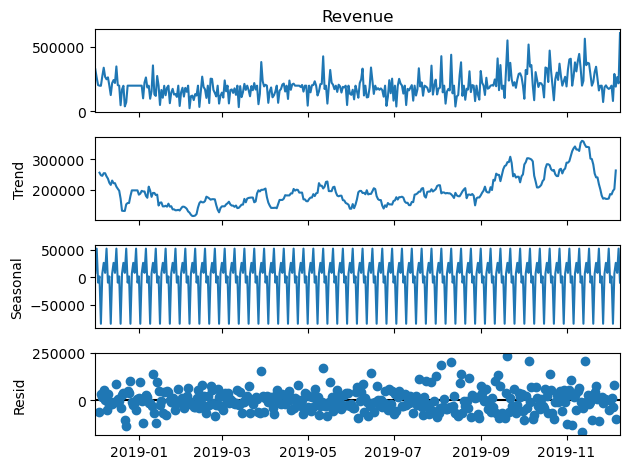

In [87]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from tabulate import tabulate
import matplotlib.pyplot as plt

# Preparing the Revenue Time Series
# Grouping by transaction_date and calculate the total revenue for each date
revenue_time_series = df_pandas.groupby('transaction_date')['Revenue'].sum().reset_index()

# Converting transaction_date to datetime format
revenue_time_series['transaction_date'] = pd.to_datetime(revenue_time_series['transaction_date'])

# Creating a complete date range from the minimum to maximum date
full_date_range = pd.date_range(start=revenue_time_series['transaction_date'].min(),
                                end=revenue_time_series['transaction_date'].max(), freq='D')

# Setting the transaction_date as the index
revenue_time_series = revenue_time_series.set_index('transaction_date')

# Calculating the mean revenue
mean_revenue = revenue_time_series['Revenue'].mean()

# Reindexing the time series to include all dates in the range
# Initially filling with NaN to correctly count missing dates
revenue_time_series = revenue_time_series.reindex(full_date_range)
# Identifying missing dates
missing_dates = revenue_time_series[revenue_time_series['Revenue'].isnull()].index
# Filling missing dates with the mean revenue
revenue_time_series['Revenue'].fillna(mean_revenue, inplace=True)
revenue_time_series.index.name = 'transaction_date'

# Calculating the number of missing dates filled
missing_dates_filled = len(missing_dates)

# Displaying the number of missing dates filled
print(f"Number of missing dates filled: {missing_dates_filled}")

# Displaying only the missing dates and their filled values
missing_dates_filled_df = revenue_time_series.loc[missing_dates]
print("Missing Dates and Filled Revenue Values:")
print(tabulate(missing_dates_filled_df.reset_index().head(5), headers=['Date', 'Filled Revenue'], tablefmt='fancy_grid', showindex=False))

# Displaying the first few rows of the time series with missing dates filled
print("Revenue Time Series with Missing Dates Filled:")
print(tabulate(revenue_time_series.head(5), headers=['Date', 'Revenue'], tablefmt='fancy_grid', showindex=True))

# Decomposing the time series using the additive mode
# Adjusting the period to reflect a smaller cycle, such as weekly
decomposition = seasonal_decompose(revenue_time_series['Revenue'], model='additive', period=7)

# Plot the decomposition results
decomposition.plot()
plt.show()



**Analysis of Decomposed Revenue Time Series:**
* **Trend Component:** The trend shows a gradual change in revenue levels over time. It highlights periods of decline and recovery, indicating overall revenue movement across the year. A notable dip is visible around mid-2019, followed by a rise towards the end.

* **Seasonal Component:** The seasonal plot reveals a clear recurring weekly pattern in the revenue, with peaks and troughs that repeat regularly. This indicates a consistent seasonality that could be influenced by factors such as customer behavior on specific days of the week.

* **Residual Component:** The residuals represent random fluctuations that are not explained by the trend or seasonality. These variations suggest unexpected changes in revenue, highlighting noise in the data that could be due to external factors or irregular events.

**Conclusion:**

The decomposition confirms that the revenue series exhibits strong seasonality with a noticeable weekly cycle, along with a dynamic trend and some level of random noise. Understanding these components can help in forecasting future revenue patterns and making data-driven decisions.

## Question 2.2 We will try to use time series model ARIMA for forecasting the future. you need to find the best model with different parameters on ARIMA model. The parameter range for p,d,q are all from [0, 1, 2]. In total, you need to find out the best model with lowest Mean Absolute Error from 27 choices based on the time from ”Jan-01-2019” to ”Nov-01-2019” (you might need to split the time series to train and test with grid search according to the M05B material).

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\anaconda3\Lib\site-packages\stat

ARIMA Model Selection Results:
╒════════════════════╤══════════════════╕
│ ARIMA Parameters   │              MAE │
╞════════════════════╪══════════════════╡
│ (1, 0, 1)          │  88901.1         │
├────────────────────┼──────────────────┤
│ (1, 1, 2)          │  90309.7         │
├────────────────────┼──────────────────┤
│ (1, 1, 1)          │  90443.1         │
├────────────────────┼──────────────────┤
│ (0, 1, 2)          │  90443.9         │
├────────────────────┼──────────────────┤
│ (0, 1, 1)          │  90465.8         │
├────────────────────┼──────────────────┤
│ (2, 1, 1)          │  90490.5         │
├────────────────────┼──────────────────┤
│ (2, 1, 2)          │  90528.9         │
├────────────────────┼──────────────────┤
│ (0, 2, 2)          │  91371.5         │
├────────────────────┼──────────────────┤
│ (2, 1, 0)          │  92327.8         │
├────────────────────┼──────────────────┤
│ (1, 1, 0)          │  93262.7         │
├────────────────────┼──────────────────┤
│ (

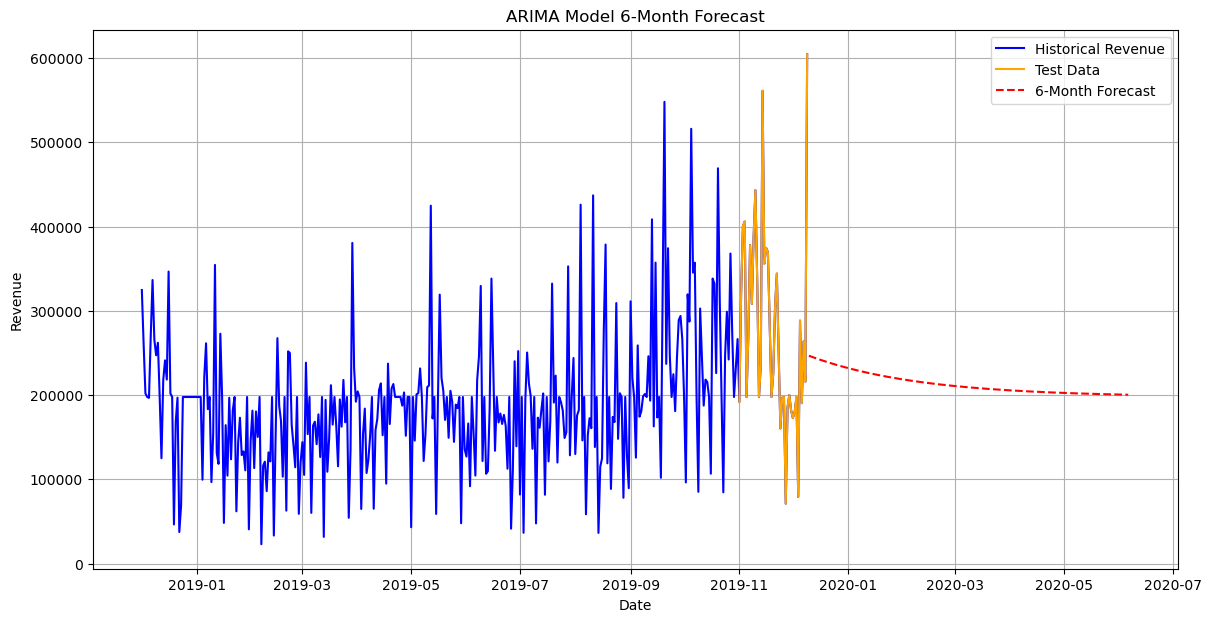

In [88]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
from tabulate import tabulate
import matplotlib.pyplot as plt

# Preparing the Revenue Time Series
# Splitting data into training (up to '2019-11-01') and testing (after '2019-11-01')
train_data = revenue_time_series[:'2019-11-01']
test_data = revenue_time_series['2019-11-01':]

# Defining the parameter ranges for p, d, q
p = d = q = range(0, 3)
pdq_combinations = [(x, y, z) for x in p for y in d for z in q]

# Initializing variables to store the best parameter combination and lowest MAE
best_params = None
lowest_mae = float('inf')
results = []

# Grid Search over parameter combinations
for params in pdq_combinations:
    try:
        # Fitting the ARIMA model with the current parameter set
        model = ARIMA(train_data, order=params)
        model_fit = model.fit()

        # Forecasting the next period
        forecast = model_fit.forecast(steps=len(test_data))

        # Calculating Mean Absolute Error
        mae = mean_absolute_error(test_data, forecast)

        # Storing the results
        results.append((params, mae))

        # Updating the best model if the current one is better
        if mae < lowest_mae:
            lowest_mae = mae
            best_params = params

    except Exception as e:
        print(f"ARIMA model {params} failed: {e}")

# Displaying results sorted by MAE
results_df = pd.DataFrame(results, columns=['ARIMA Parameters', 'MAE'])
results_df = results_df.sort_values(by='MAE')

print("ARIMA Model Selection Results:")
print(tabulate(results_df, headers='keys', tablefmt='fancy_grid', showindex=False))

# Displaying the best model
print(f"\nBest ARIMA Model: {best_params} with Lowest MAE: {lowest_mae}")

# Fitting the best ARIMA model on the entire dataset and forecast future values
best_model = ARIMA(revenue_time_series, order=best_params)
best_model_fit = best_model.fit()

# Forecasting the next 6 months (approximately 180 days)
forecast_periods = 180
forecast = best_model_fit.forecast(steps=forecast_periods)

# Plotting the actual data, test data, and forecast
plt.figure(figsize=(14, 7))
plt.plot(revenue_time_series, label='Historical Revenue', color='blue')
plt.plot(test_data, label='Test Data', color='orange')
plt.plot(forecast, label='6-Month Forecast', color='red', linestyle='--')
plt.title('ARIMA Model 6-Month Forecast')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.show()


## Question 2.3 There are many deep learning time series forecasting methods, could you please explore those methods and write down the necessary data wrangling and modeling steps (steps on how to achieve, not actual code). Also please give the reference of the deep learning time series forecasting models you are using.


**Deep Learning Time Series Forecasting Methods**

Deep learning models are powerful tools for time series forecasting due to their ability to model complex patterns, capture non-linear dependencies, and handle large amounts of data. Below, we explore some popular deep learning methods for time series forecasting and outline the necessary steps for data wrangling and modeling.

**Key Deep Learning Methods for Time Series Forecasting**

**1) Recurrent Neural Networks (RNNs)**

* **Overview:** RNNs are designed for sequential data, making them suitable for time series forecasting. They maintain a memory of previous inputs in the sequence, allowing them to model temporal dependencies.
* **Variants:** Long Short-Term Memory (LSTM) networks and Gated Recurrent Units (GRUs) are commonly used variants that address the vanishing gradient problem seen in traditional RNNs.

**2) Convolutional Neural Networks (CNNs) for Time Series**

* **Overview:** CNNs can learn spatial hierarchies and extract features from time series data by treating sequences as spatial patterns. They are particularly effective in capturing local dependencies.
* **Approach:** Use 1D CNN layers to extract features from the time series data, followed by dense layers for forecasting.

**3) Transformers**

* **Overview:** Transformers use attention mechanisms to capture relationships between time steps, making them effective for time series with long-range dependencies.
* **Special Variant:** Temporal Fusion Transformers (TFT) are specifically designed for time series forecasting, leveraging both past data and external factors.

**4) Hybrid Models (e.g., CNN-LSTM)**

* **Overview:** Hybrid models combine the strengths of different architectures, such as CNNs for feature extraction and LSTMs for sequential learning, to improve forecasting accuracy.

**Data Wrangling and Modeling Steps**

**1) Data Preparation**

**Step 1: Data Cleaning**

* Remove or handle missing values using imputation techniques (e.g., mean, median) or interpolation.
* Correct outliers if necessary or retain them if they represent genuine variability in the data.

**Step 2: Data Transformation**

* Normalize or standardize the data to ensure all features are on the same scale, which helps improve model performance.
* Apply log transformation to stabilize variance if data is skewed.

**Step 3: Sequence Formatting**

* Convert the data into sequences of input-output pairs, where each input sequence is used to predict the next value. This often involves reshaping the data into a 3D format: (samples, time steps, features).

**Step 4: Train-Test Split**
* Split the data into training, validation, and test sets while maintaining the chronological order to avoid data leakage.

**2) Modeling Steps**

**Step 5: Model Architecture Design**
* **RNNs/LSTMs/GRUs:** Design the architecture with input, hidden (LSTM/GRU), and output layers. Include dropout layers to reduce overfitting.
* **CNNs:** Design a 1D-CNN architecture with convolutional, pooling, and dense layers to capture temporal patterns.
* **Transformers:** Set up multi-head attention layers, positional encoding, and feed-forward layers to model sequential dependencies.
* **Hybrid Models:** Combine CNN layers for feature extraction with LSTM layers for sequence learning.

**Step 6: Model Compilation**
* Compile the model using an appropriate loss function (e.g., Mean Squared Error) and optimizer (e.g., Adam, RMSprop).

**Step 7: Model Training**
* Train the model using the training set, validating with the validation set. Implement early stopping based on validation loss to prevent overfitting.

**Step 8: Model Evaluation**
* Evaluate the model’s performance on the test set using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), or Root Mean Squared Error (RMSE).

**Step 9: Hyperparameter Tuning**
* Tune model hyperparameters such as the number of layers, units per layer, learning rate, and batch size using methods like grid search or random search.

**Step 10: Forecasting and Visualization**
* Use the trained model to forecast future values and visualize the results to assess the model's predictive power.

**References**
* **LSTM and GRU Models:** Hochreiter, S., & Schmidhuber, J. (1997). Long Short-Term Memory. Neural Computation, 9(8), 1735-1780.
* **CNN for Time Series:** Borovykh, A., Bohte, S., & Oosterlee, C. W. (2017). Conditional Time Series Forecasting with Convolutional Neural Networks. arXiv preprint arXiv:1703.04691.
* **Transformers for Time Series:** Vaswani, A., et al. (2017). Attention is All You Need. Advances in Neural Information Processing Systems.
* **Hybrid Models:** Livieris, I. E., Drakopoulou, K., & Pintelas, P. (2020). A Hybrid CNN–LSTM Model for Forecasting Time Series Data. Neural Computing and Applications, 32(23), 17269-17282.